In [1]:
%load_ext autoreload
%autoreload 2



%autoreload 2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.spatial.distance import pdist, squareform
from scipy.special import expit
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering  # Add this import
import numpy as np
import pandas as pd
import sys
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts')
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision')
from utils import *
import sys
import os
import gc


def subset_data(Y, E, G, start_index, end_index):
    """Subset data based on indices."""
    indices = list(range(start_index, end_index))
    Y_subset = Y[indices]
    E_subset = E[indices]
    G_subset = G[indices]
    return Y_subset, E_subset, G_subset, indices

def load_model_essentials(base_path='/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/data_for_running/'):
    """
    Load all essential components
    """
    print("Loading components...")
    
    # Load large matrices
    Y = torch.load(base_path + 'Y_tensor.pt')
    E = torch.load(base_path + 'E_enrollment_full.pt')
    G = torch.load(base_path + 'G_matrix.pt')
    
    # Load other components
    essentials = torch.load(base_path + 'model_essentials.pt')
    
    print("Loaded all components successfully!")
    
    return Y, E, G, essentials

# Load and initialize model:
Y, E, G, essentials = load_model_essentials()

    
    # Path to your total fit model
from clust_huge_amp_fixedPhi import *
total_fit_path = '/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/enrollment_model_W0.0001_fulldata_sexspecific.pt'
total_checkpoint = torch.load(total_fit_path, map_location='cpu')
phi_total = total_checkpoint['model_state_dict']['phi'].cpu().numpy()  # shape: (K, D, T)
psi_total = total_checkpoint['model_state_dict']['psi'].cpu().numpy()  # shape: (K, D, T)

# Load the RDS file

import pandas as pd
fh_processed=pd.read_csv('/Users/sarahurbut/Library/Cloudstorage/Dropbox-Personal/baselinagefamh.csv')
len(fh_processed)
disease_names=essentials['disease_names']
prevalence_logit=essentials['prevalence_t']


Loading components...


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_17475/1627225843.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/v

Loaded all components successfully!


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_17475/1627225843.py:60: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  total_checkpoint = torch.load(total_fit_path

In [36]:
total_fit_path = '/Users/sarahurbut/Library/CloudStorage/Dropbox-Personal/enrollment_model_W0.0001_fulldata_sexspecific.pt'
total_checkpoint = torch.load(total_fit_path, map_location='cpu')
phi = total_checkpoint['model_state_dict']['phi'].cpu().numpy()  # shape: (K, D, T)
psi_total = total_checkpoint['model_state_dict']['psi'].cpu().numpy()

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_95654/3965418255.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  total_checkpoint = torch.load(total_fit_path,

In [38]:
import torch
import numpy as np
import pandas as pd
import gc
import cProfile
import pstats
from pstats import SortKey
from clust_huge_amp_fixedPhi import *

# ============================================================================
# CONFIGURATION
# ============================================================================
# Define all batches (adjust end point to your actual dataset size)
batches = [
    (0, 10000),
    (10000, 20000),
    (20000, 30000),
    (30000, 40000),
    (40000, 50000),
    (50000, 60000),
    (60000, 70000),
    (70000, 80000),
    (80000, 90000),
    (90000, 100000),
    (100000, 110000),
    (110000, 120000),
    (120000, 130000),
    (130000, 140000),
    (140000, 150000),
    (150000, 160000),
    (160000, 170000),
    (170000, 180000),
    (180000, 190000),
    (190000, 200000),
    (200000, 210000),
    (210000, 220000),
    (220000, 230000),
    (230000, 240000),
    (240000, 250000),
    (250000, 260000),
    (260000, 270000),
    (270000, 280000),
    (280000, 290000),
    (290000, 300000),
    (300000, 310000),
    (310000, 320000),
    (320000, 330000),
    (330000, 340000),
    (340000, 350000),
    (350000, 360000),
    (360000, 370000),
    (370000, 380000),
    (380000, 390000),
    (390000, 400000),
    # Adjust to your actual size
]

output_dir = "/Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_predictions_fixedphi/"

# Create output directory if it doesn't exist
import os
os.makedirs(output_dir, exist_ok=True)

print(f"Will process {len(batches)} batches")
print(f"Output directory: {output_dir}")

# ============================================================================
# PROCESS EACH BATCH
# ============================================================================
for batch_idx, (start, stop) in enumerate(batches):
    print(f"\n{'='*80}")
    print(f"BATCH {batch_idx+1}/{len(batches)}: Processing patients {start} to {stop}")
    print(f"{'='*80}")
    
    try:
        # Set random seeds for reproducibility
        torch.manual_seed(42)
        np.random.seed(42)
        if torch.cuda.is_available():
            torch.cuda.manual_seed(42)
            torch.backends.cudnn.deterministic = True
        
        # Subset the data
        print(f"Subsetting data...")
        Y_batch, E_batch, G_batch, indices = subset_data(Y, E, G, 
                                                          start_index=start, 
                                                          end_index=stop)
        
        # Get demographics and add sex
        pce_df_subset = fh_processed.iloc[start:stop].reset_index(drop=True)
        sex = pce_df_subset['sex'].values
        G_with_sex = np.column_stack([G_batch, sex])
        
        print(f"Data shapes: Y={Y_batch.shape}, E={E_batch.shape}, G={G_with_sex.shape}")
        
        # Initialize model with FIXED phi and psi
        print(f"Initializing model with fixed phi/psi...")
        model = AladynSurvivalFixedPhi(
            N=Y_batch.shape[0],
            D=Y_batch.shape[1],
            T=Y_batch.shape[2],
            K=20,
            P=G_with_sex.shape[1],
            G=G_with_sex,
            Y=Y_batch,
            R=0,
            W=0.0001,
            prevalence_t=essentials['prevalence_t'],
            init_sd_scaler=1e-1,
            genetic_scale=1,
            pretrained_phi=phi_total,
            pretrained_psi=psi_total,
            signature_references=signature_refs,
            healthy_reference=True,
            disease_names=essentials['disease_names']
        )
        
        # Verify phi and psi are fixed
        if np.allclose(model.phi.cpu().numpy(), phi_total):
            print("✓ phi matches phi_total!")
        else:
            print("✗ WARNING: phi does NOT match phi_total!")
            
        if np.allclose(model.psi.cpu().numpy(), psi_total):
            print("✓ psi matches psi_total!")
        else:
            print("✗ WARNING: psi does NOT match psi_total!")
        
        # Train model (only lambda is being estimated)
        print(f"Training model...")
        profiler = cProfile.Profile()
        profiler.enable()
        
        history = model.fit(
            E_batch, 
            num_epochs=200, 
            learning_rate=1e-1, 
            lambda_reg=1e-2
        )
        
        profiler.disable()
        stats = pstats.Stats(profiler).sort_stats(SortKey.CUMULATIVE)
        stats.print_stats(10)
        
        # Generate and save predictions
        print(f"Generating predictions...")
        with torch.no_grad():
            pi, _, _ = model.forward()
            
            # Save predictions
            pi_filename = os.path.join(output_dir, 
                                       f"pi_enroll_fixedphi_sex_{start}_{stop}.pt")
            torch.save(pi, pi_filename)
            print(f"✓ Saved predictions to {pi_filename}")
            
            # Save model state (optional, for debugging)
            model_filename = os.path.join(output_dir, 
                                         f"model_enroll_fixedphi_sex_{start}_{stop}.pt")
            torch.save({
                'model_state_dict': model.state_dict(),
                'E': E_batch,
                'prevalence_t': model.prevalence_t,
                'logit_prevalence_t': model.logit_prev_t,
                'start_index': start,
                'end_index': stop,
                #'history': history
            }, model_filename)
            print(f"✓ Saved model to {model_filename}")
        
        # Clean up to free memory
        print(f"Cleaning up memory...")
        del pi, model, Y_batch, E_batch, G_batch, G_with_sex, pce_df_subset
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        gc.collect()
        
        print(f"✓ Batch {batch_idx+1}/{len(batches)} complete!")
        
    except Exception as e:
        print(f"✗ ERROR in batch {start}-{stop}: {e}")
        import traceback
        traceback.print_exc()
        continue

print(f"\n{'='*80}")
print(f"ALL BATCHES COMPLETE!")
print(f"{'='*80}")

# ============================================================================
# CONCATENATE ALL PREDICTIONS INTO ONE FILE
# ============================================================================
print(f"\nConcatenating all predictions into single file...")
pi_batches = []
successful_batches = []

for start, stop in batches:
    pi_filename = os.path.join(output_dir, f"pi_enroll_fixedphi_sex_{start}_{stop}.pt")
    try:
        pi_batch = torch.load(pi_filename)
        pi_batches.append(pi_batch)
        successful_batches.append((start, stop))
        print(f"✓ Loaded {pi_filename}, shape: {pi_batch.shape}")
    except Exception as e:
        print(f"✗ Could not load {pi_filename}: {e}")

if pi_batches:
    print(f"\nConcatenating {len(pi_batches)} batches...")
    pi_full = torch.cat(pi_batches, dim=0)
    print(f"Final shape: {pi_full.shape}")
    
    # Save combined file
    full_filename = os.path.join(output_dir, "pi_enroll_fixedphi_sex_FULL.pt")
    torch.save(pi_full, full_filename)
    print(f"✓ Saved combined predictions to {full_filename}")
    
    # Save batch info
    batch_info = {
        'batches': successful_batches,
        'total_patients': pi_full.shape[0],
        'n_diseases': pi_full.shape[1],
        'n_timepoints': pi_full.shape[2]
    }
    info_filename = os.path.join(output_dir, "batch_info.pt")
    torch.save(batch_info, info_filename)
    print(f"✓ Saved batch info to {info_filename}")
else:
    print("✗ No successful batches to concatenate!")

print(f"\n{'='*80}")
print(f"DONE! Ready for washout analysis.")
print(f"{'='*80}")

Will process 40 batches
Output directory: /Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_predictions_fixedphi/

BATCH 1/40: Processing patients 0 to 10000
Subsetting data...
Data shapes: Y=torch.Size([10000, 348, 52]), E=torch.Size([10000, 348]), G=(10000, 37)
Initializing model with fixed phi/psi...
Pre-calculated phi GP loss: 75.6916

Calculating gamma for k=0:


/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp_fixedPhi.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.signature_refs = torch.tensor(signature_references, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp_fixedPhi.py:89: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)


Number of diseases in signature: 8.0
Base value (first 5): tensor([0.0000, 0.0000, 0.0000, 0.0048, 0.0000])
Base value centered (first 5): tensor([-0.0003, -0.0003, -0.0003,  0.0045, -0.0003])
Base value centered mean: 1.3969838740662821e-12
Gamma init for k=0 (first 5): tensor([ 1.0889e-05,  1.9510e-05, -1.1489e-05,  2.2187e-05,  3.4732e-05])

Calculating gamma for k=1:
Number of diseases in signature: 8.0
Base value (first 5): tensor([0.0024, 0.0000, 0.0000, 0.0000, 0.0000])
Base value centered (first 5): tensor([ 0.0022, -0.0002, -0.0002, -0.0002, -0.0002])
Base value centered mean: -3.278255444882916e-11
Gamma init for k=1 (first 5): tensor([5.7990e-06, 3.1550e-06, 9.8705e-06, 1.2848e-05, 2.6094e-06])

Calculating gamma for k=2:
Number of diseases in signature: 6.0
Base value (first 5): tensor([0., 0., 0., 0., 0.])
Base value centered (first 5): tensor([-0.0004, -0.0004, -0.0004, -0.0004, -0.0004])
Base value centered mean: 1.3597309909962885e-11
Gamma init for k=2 (first 5): tenso

/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp_fixedPhi.py:179: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  event_times_tensor = torch.tensor(event_times, dtype=torch.long)


Kappa gradient: -1.121e+00

Epoch 0
Loss: 16.9871

Monitoring signature responses:

Disease 47 (signature 15, LR=84.92):
  Theta for diagnosed: 0.014 ± 0.005
  Theta for others: 0.014
  Proportion difference: 0.000

Disease 21 (signature 13, LR=78.13):
  Theta for diagnosed: 0.023 ± 0.007
  Theta for others: 0.023
  Proportion difference: -0.000

Disease 249 (signature 13, LR=71.64):
  Theta for diagnosed: 0.023 ± 0.007
  Theta for others: 0.023
  Proportion difference: -0.000

Disease 336 (signature 9, LR=64.79):
  Theta for diagnosed: 0.030 ± 0.005
  Theta for others: 0.030
  Proportion difference: 0.000

Disease 127 (signature 0, LR=62.13):
  Theta for diagnosed: 0.028 ± 0.020
  Theta for others: 0.028
  Proportion difference: 0.000
Kappa gradient: -9.449e-01

Epoch 1
Loss: 657.8505

Monitoring signature responses:

Disease 47 (signature 15, LR=84.92):
  Theta for diagnosed: 0.014 ± 0.004
  Theta for others: 0.014
  Proportion difference: 0.000

Disease 21 (signature 13, LR=78.13):


/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp_fixedPhi.py:75: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.signature_refs = torch.tensor(signature_references, dtype=torch.float32)
/Users/sarahurbut/aladynoulli2/pyScripts/clust_huge_amp_fixedPhi.py:89: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.Y = torch.tensor(Y, dtype=torch.float32)



Calculating gamma for k=3:
Number of diseases in signature: 43.0
Base value (first 5): tensor([0.0000, 0.0009, 0.0000, 0.0004, 0.0000])
Base value centered (first 5): tensor([-0.0001,  0.0008, -0.0001,  0.0003, -0.0001])
Base value centered mean: 9.313225510882914e-14
Gamma init for k=3 (first 5): tensor([-3.5480e-06, -1.0894e-06,  5.5306e-07,  2.6088e-06,  1.6893e-06])

Calculating gamma for k=4:
Number of diseases in signature: 5.0
Base value (first 5): tensor([0., 0., 0., 0., 0.])
Base value centered (first 5): tensor([-0.0002, -0.0002, -0.0002, -0.0002, -0.0002])
Base value centered mean: 1.0430812463768646e-11
Gamma init for k=4 (first 5): tensor([ 1.1920e-06, -1.2090e-05,  1.5850e-05,  3.9805e-05,  2.0650e-05])

Calculating gamma for k=5:
Number of diseases in signature: 2.0
Base value (first 5): tensor([0., 0., 0., 0., 0.])
Base value centered (first 5): tensor([-0.0011, -0.0011, -0.0011, -0.0011, -0.0011])
Base value centered mean: 1.4901160817412662e-12
Gamma init for k=5 (fi

/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_95654/386243084.py:199: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pi_batch = torch.load(pi_filename)


✓ Loaded /Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_predictions_fixedphi/pi_enroll_fixedphi_sex_10000_20000.pt, shape: torch.Size([10000, 348, 52])
✓ Loaded /Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_predictions_fixedphi/pi_enroll_fixedphi_sex_20000_30000.pt, shape: torch.Size([10000, 348, 52])
✓ Loaded /Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_predictions_fixedphi/pi_enroll_fixedphi_sex_30000_40000.pt, shape: torch.Size([10000, 348, 52])
✓ Loaded /Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_predictions_fixedphi/pi_enroll_fixedphi_sex_40000_50000.pt, shape: torch.Size([10000, 348, 52])
✓ Loaded /Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_predictions_fixedphi/pi_enroll_fixedphi_sex_50000_60000.pt, shape: torch.Size([10000, 348, 52])
✓ Loaded /Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_predictions_fixedphi/pi_enroll_fixedphi_sex_60000_70000.pt, shape: torch.Size([10000, 348, 52])
✓ Loaded /Users/sarahu

In [47]:
history=tl['history']

In [51]:
import torch
import os

dir_path = "/Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_predictions_fixedphi/"

# Get all model files
model_files = [f for f in os.listdir(dir_path) 
               if f.startswith('model_enroll_fixedphi_sex_') and f.endswith('.pt')]

print(f"Found {len(model_files)} model files")
print("Removing history from all checkpoints...\n")

for filename in model_files:
    filepath = os.path.join(dir_path, filename)
    
    # Get original size
    original_size = os.path.getsize(filepath) / 1e9
    print(f"Cleaning {filename} ({original_size:.2f} GB)...")
    
    # Load checkpoint
    checkpoint = torch.load(filepath)
    
    # Remove history and clone tensors
    clean_checkpoint = {
        'model_state_dict': {k: v.clone() if isinstance(v, torch.Tensor) else v 
                            for k, v in checkpoint['model_state_dict'].items()},
        'E': checkpoint['E'].clone(),
        'prevalence_t': checkpoint['prevalence_t'].clone(),
        'logit_prevalence_t': checkpoint['logit_prevalence_t'].clone(),
        'start_index': checkpoint['start_index'],
        'end_index': checkpoint['end_index']
        # NO HISTORY!
    }
    
    # Save cleaned version
    torch.save(clean_checkpoint, filepath)
    
    new_size = os.path.getsize(filepath) / 1e9
    saved = original_size - new_size
    
    print(f"✓ {original_size:.2f} GB → {new_size:.3f} GB (saved {saved:.2f} GB)\n")
    
    # Clean up
    del checkpoint, clean_checkpoint

print("✅ All files cleaned! History removed.")

Found 40 model files
Removing history from all checkpoints...

Cleaning model_enroll_fixedphi_sex_140000_150000.pt (8.81 GB)...


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_95654/1639518364.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filepath)


✓ 8.81 GB → 0.073 GB (saved 8.74 GB)

Cleaning model_enroll_fixedphi_sex_10000_20000.pt (8.81 GB)...
✓ 8.81 GB → 0.073 GB (saved 8.74 GB)

Cleaning model_enroll_fixedphi_sex_340000_350000.pt (8.81 GB)...
✓ 8.81 GB → 0.073 GB (saved 8.74 GB)

Cleaning model_enroll_fixedphi_sex_240000_250000.pt (8.81 GB)...
✓ 8.81 GB → 0.073 GB (saved 8.74 GB)

Cleaning model_enroll_fixedphi_sex_110000_120000.pt (8.81 GB)...
✓ 8.81 GB → 0.073 GB (saved 8.74 GB)

Cleaning model_enroll_fixedphi_sex_40000_50000.pt (8.81 GB)...
✓ 8.81 GB → 0.073 GB (saved 8.74 GB)

Cleaning model_enroll_fixedphi_sex_310000_320000.pt (8.81 GB)...
✓ 8.81 GB → 0.073 GB (saved 8.74 GB)

Cleaning model_enroll_fixedphi_sex_390000_400000.pt (8.81 GB)...
✓ 8.81 GB → 0.073 GB (saved 8.74 GB)

Cleaning model_enroll_fixedphi_sex_210000_220000.pt (8.81 GB)...
✓ 8.81 GB → 0.073 GB (saved 8.74 GB)

Cleaning model_enroll_fixedphi_sex_150000_160000.pt (8.81 GB)...
✓ 8.81 GB → 0.073 GB (saved 8.74 GB)

Cleaning model_enroll_fixedphi_sex_3500

In [58]:
# Load the RDS file
readRDS = robjects.r['readRDS']
pce_data = readRDS('/Users/sarahurbut/Library/Cloudstorage/Dropbox-Personal/pce_df_prevent.rds')
pce_df = pandas2ri.rpy2py(pce_data)  # Convert to pandas DataFrame


In [83]:
# Test if import works
try:
    from evaluatetdccode import evaluate_major_diseases_wsex_with_bootstrap_dynamic_1year_different_start_end_numeric_sex
    print("✅ Import successful")
except ImportError as e:
    print(f"❌ Import failed: {e}")



✅ Import successful


In [75]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
from evaluatetdccode import *

In [4]:
import torch
import pandas as pd
from evaluatetdccode import evaluate_major_diseases_wsex_with_bootstrap_dynamic_1year_different_start_end_numeric_sex

# Load the full data once
Y, E, G, essentials = load_model_essentials()
fh_processed = pd.read_csv('/Users/sarahurbut/Library/Cloudstorage/Dropbox-Personal/baselinagefamh.csv')

# Define batches (same as training)
batches = [
    (0, 10000)#, (10000, 20000), (20000, 30000), 
    # ... add all your batches
]

# Storage for results
washout_results = {
    '0yr': {},  # No washout
    '1yr': {},  # 1-year washout  
    '2yr': {}   # 2-year washout
}

# Run washout analysis on each batch
for start, stop in batches:
    print(f"\n=== Processing batch {start}-{stop} ===")
    
    # Load batch predictions
    pi_filename = f"/Users/sarahurbut/Library/CloudStorage/Dropbox/enrollment_predictions_fixedphi/pi_enroll_fixedphi_sex_{start}_{stop}.pt"
    pi_batch = torch.load(pi_filename)
    
    # Subset other data to match
    Y_batch = Y[start:stop]
    E_batch = E[start:stop] 
    pce_df_batch = fh_processed.iloc[start:stop].reset_index(drop=True)
    
    # Run washout analysis for this batch
    for washout_name, offset in [('0yr', 0), ('1yr', 1), ('2yr', 2)]:
        print(f"  Running {washout_name} washout...")
        
        results = evaluate_major_diseases_wsex_with_bootstrap_dynamic_1year_different_start_end_numeric_sex(
            pi=pi_batch,
            Y_100k=Y_batch,
            E_100k=E_batch,
            disease_names=essentials['disease_names'],
            pce_df=pce_df_batch,
            n_bootstraps=50,  # Fewer bootstraps per batch
            follow_up_duration_years=1,
            start_offset=offset
        )
        
        # Store results
        for disease, metrics in results.items():
            if disease not in washout_results[washout_name]:
                washout_results[washout_name][disease] = {
                    'aucs': [], 'cis': [], 'events': [], 'rates': []
                }
            
            washout_results[washout_name][disease]['aucs'].append(metrics['auc'])
            washout_results[washout_name][disease]['cis'].append((metrics['ci_lower'], metrics['ci_upper']))
            washout_results[washout_name][disease]['events'].append(metrics['n_events'])
            washout_results[washout_name][disease]['rates'].append(metrics['event_rate'])
    
    # Clean up memory
    del pi_batch, Y_batch, E_batch, pce_df_batch
    torch.cuda.empty_cache() if torch.cuda.is_available() else None

# Aggregate results across batches
print("\n=== AGGREGATED WASHOUT RESULTS ===")
for washout_name, diseases in washout_results.items():
    print(f"\n{washout_name.upper()} WASHOUT:")
    for disease, metrics in diseases.items():
        aucs = [a for a in metrics['aucs'] if not pd.isna(a)]
        if aucs:
            mean_auc = np.mean(aucs)
            print(f"  {disease}: {mean_auc:.3f} (from {len(aucs)} batches)")

Loading components...


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_17475/1627225843.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y = torch.load(base_path + 'Y_tensor.pt')
/v

Loaded all components successfully!

=== Processing batch 0-10000 ===
  Running 0yr washout...


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_17475/47699313.py:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pi_batch = torch.load(pi_filename)


Filtering for 1: Found 4591 individuals in cohort

Summary of Results (1-Year Risk, Sex-Adjusted, Offset=0):
--------------------------------------------------------------------------------
Disease Group        AUC                       Events     Rate (%)   C-index   
--------------------------------------------------------------------------------
ASCVD                0.890 (0.845-0.938)       78         0.8        N/A
Diabetes             0.754 (0.665-0.881)       33         0.3        N/A
Atrial_Fib           0.785 (0.707-0.909)       22         0.2        N/A
CKD                  0.871 (0.567-0.999)       4          0.0        N/A
All_Cancers          0.780 (0.713-0.840)       26         0.3        N/A
Stroke               0.717 (0.592-0.815)       5          0.1        N/A
Heart_Failure        0.851 (0.756-0.955)       15         0.1        N/A
Pneumonia            0.484 (0.345-0.634)       15         0.1        N/A
COPD                 0.746 (0.607-0.869)       17         0.2    

✓ Saved washout analysis plots!
✓ Saved washout summary table!


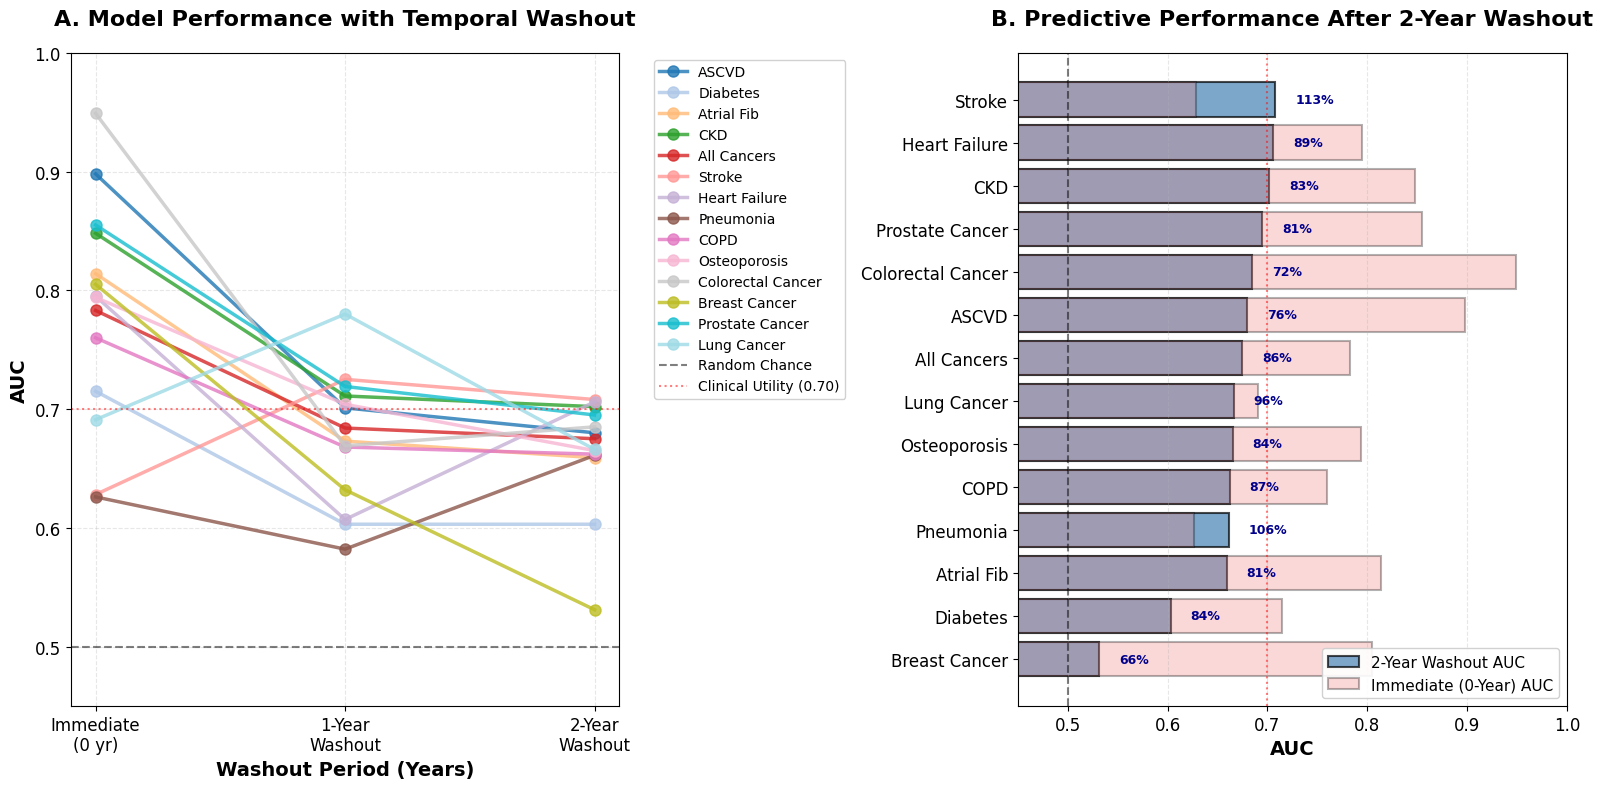

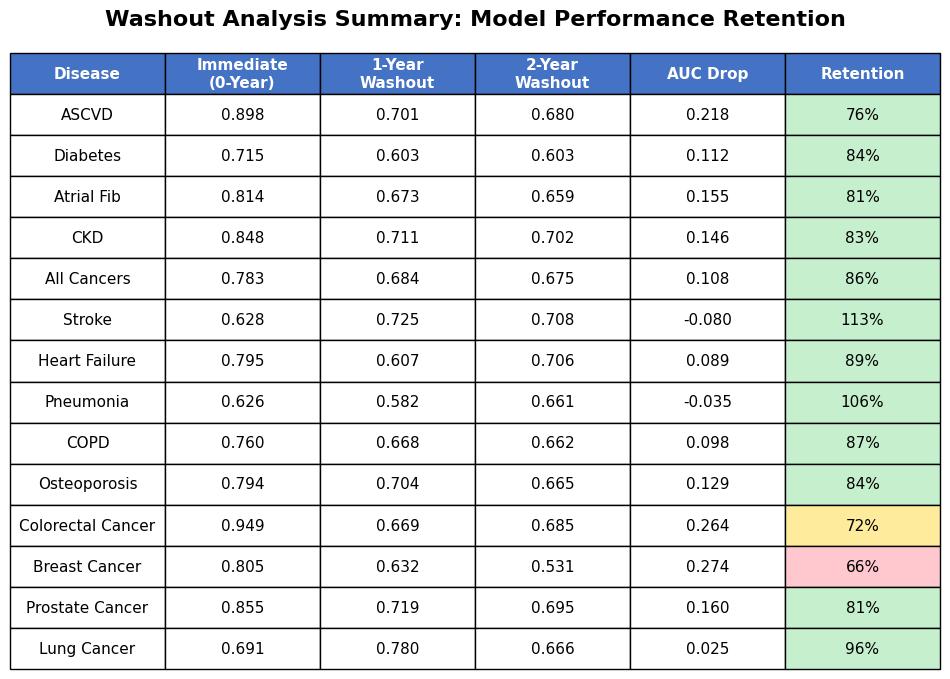


WASHOUT ANALYSIS SUMMARY STATISTICS
Mean AUC at 0-year: 0.783 (SD: 0.094)
Mean AUC at 1-year: 0.676 (SD: 0.055)
Mean AUC at 2-year: 0.664 (SD: 0.047)

Mean AUC drop: 0.119 (SD: 0.101)
Mean retention: 86.0% (SD: 12.3%)

Diseases with AUC > 0.7 at 2-year washout: 3/14
Diseases with AUC > 0.65 at 2-year washout: 12/14
Diseases with AUC > 0.6 at 2-year washout: 13/14


In [3]:
from plot_washout_results import *